In [1]:
!pip install mysql-connector-python


   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
    --------------------------------------- 0.3/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.4 MB 1.5 MB/s eta 0:00:11
   - -------------------------------------- 0.8/16.4 MB 1.5 MB/s eta 0:00:11
   -- ------------------------------------- 1.0/16.4 MB 1.5 MB/s eta 0:00:11
   --- ------------------------------------ 1.6/16.4 MB 1.6 MB/s eta 0:00:09
   ----- ---------------------------------- 2.1/16.4 MB 1.9 MB/s eta 0:00:08
   ------ --------------------------------- 2.6/16.4 MB 1.9 MB/s eta 0:00:08
   ------- -------------------------------- 2.9/16.4 MB 1.9 MB/s eta 0:00:07
   ------- -------------------------------- 3.1/16.4 MB 1.9 MB/s eta 0:00:08
   -------- ------------------------------- 3.4/16.4 MB 1.8 MB/s eta 0:00:08
   --------- ------------------------------ 3.9/16.4 MB 1.7 MB/s eta 0:00:08
   ---------- ----------------------------- 4.2/16.4 MB 1.7 MB/s eta 0:00:08
   ----------

In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
conn = mysql.connector.connect(
    host="localhost",    
    port=3306,          
    user="root",      
    password="Laxman22",   
    database="internship"     
)


In [ ]:
cursor = conn.cursor()
cursor.execute("SHOW TABLES;")
tables = cursor.fetchall()
print(tables)  
cursor.close()


[('online_sales_dataset',)]


True

In [10]:
query = """
SELECT 
    description,
    AVG(`unit price`) AS avg_unit_price,
    SUM(quantity) AS total_qty,
    SUM(`total cost`) AS total_revenue,
    SUM(`shipping cost`) AS total_shipping_cost
FROM `online_sales_dataset`
GROUP BY description
"""


In [11]:
cursor = conn.cursor()
cursor.execute("DESCRIBE online_sales_dataset;")
columns = cursor.fetchall()
print(columns)
cursor.close()


[('InvoiceNo', 'int', 'YES', '', None, ''), ('Product ID', 'text', 'YES', '', None, ''), ('Description', 'text', 'YES', '', None, ''), ('Quantity', 'int', 'YES', '', None, ''), ('Date', 'text', 'YES', '', None, ''), ('UnitPrice', 'double', 'YES', '', None, ''), ('CustomerID', 'text', 'YES', '', None, ''), ('Country', 'text', 'YES', '', None, ''), ('PaymentMethod', 'text', 'YES', '', None, ''), ('ShippingCost', 'text', 'YES', '', None, ''), ('SalesChannel', 'text', 'YES', '', None, ''), ('ShipmentProvider', 'text', 'YES', '', None, ''), ('WarehouseLocation', 'text', 'YES', '', None, ''), ('Total cost', 'double', 'YES', '', None, '')]


True

In [22]:
query = """
SELECT 
    description,
    AVG(`unitprice`) AS avg_unit_price,
    SUM(quantity) AS total_qty,
    SUM(`total cost`) AS total_revenue,
    AVG(`ShippingCost`) AS avg_shipping_cost,
    SUM(`total cost`) - SUM(`ShippingCost`) AS approx_profit,
    SUM(`total cost`) / SUM(quantity) AS revenue_per_unit
FROM `online_sales_dataset`
GROUP BY description
"""

df = pd.read_sql(query, conn)

print(df)


       description  avg_unit_price  total_qty  total_revenue  \
0        White Mug       47.250093     2525.0        6797.05   
1       Headphones       44.711800     2133.0        6180.93   
2        Desk Lamp       46.810139     1525.0        4553.71   
3        USB Cable       46.715000     1814.0        5646.44   
4     Office Chair       51.183030     2518.0        6655.74   
5         Notebook       47.088427     1891.0        5618.25   
6   Wireless Mouse       46.485889     2420.0        5771.02   
7         Blue Pen       49.290976     2014.0        5424.82   
8       Wall Clock       42.641028     2268.0        6321.85   
9          T-shirt       43.160388     2430.0        6213.00   
10        Backpack       47.165104     2186.0        6167.87   

    avg_shipping_cost  approx_profit  revenue_per_unit  
0           16.273738        5055.76          2.691901  
1           17.097500        4471.18          2.897764  
2           16.435833        3370.33          2.986039  
3  

C:\Users\yadav\AppData\Local\Temp\ipykernel_13524\3632364858.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


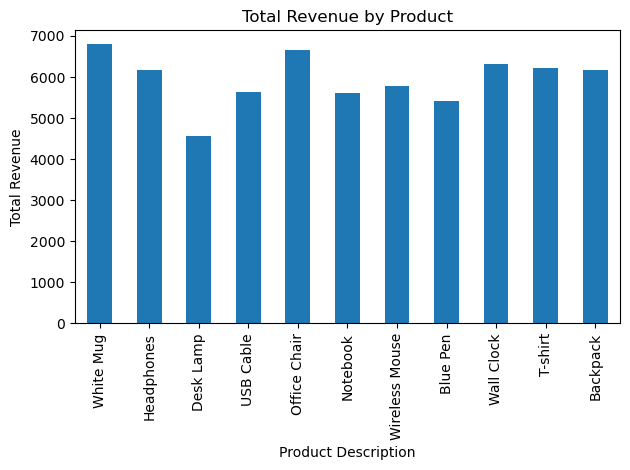

In [ ]:
import matplotlib.pyplot as plt
ax = df.plot(kind='bar', x='description', y='total_revenue', legend=False)
ax.set_xlabel("Product Description")
ax.set_ylabel("Total Revenue")
ax.set_title("Total Revenue by Product")
plt.tight_layout()
plt.show()


